# Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In this chapter we are going to implement a neural network from scratch using only numpy.

In [2]:
# create circular data
def circular_data():
    radii = [0.45, 0.25]
    center_x = 0.5
    center_y = 0.5
    num_points = 200
    X = []
    y = []
    
    for label, radius in enumerate(radii):
        for point in range(num_points):
            angle = 2 * np.pi * np.random.rand()
            feature_1 = radius * np.cos(angle) + center_x
            feature_2 = radius * np.sin(angle) + center_y
            
            X.append([feature_1, feature_2])     
            y.append([label])
            
    return np.array(X), np.array(y)

In [3]:
X, y = circular_data()

In [4]:
feature_1 = X.T[0]
feature_2 = X.T[1]

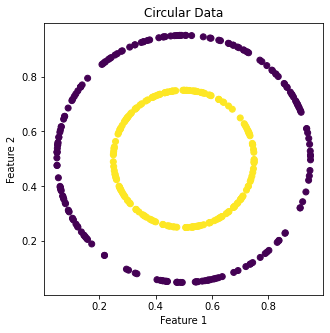

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(x=feature_1, y=feature_2, c=y)
plt.title("Circular Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [6]:
class NeuralNetwork:
    
    def __init__(self, X, y, shape=[2, 4, 2, 1], alpha = 0.1):
        self.X = X
        self.y = y
        self.alpha = alpha
        
        self.weights = []
        self.biases = []
        self.activations = []
        self.num_layers = len(shape)
        self.W_grads = []
        self.b_grads = []
        
        # initialize weights and matrices with random numbers
        for num_features, num_neurons in zip(shape[:-1], shape[1:]):
            weight_matrix = np.random.randn(num_neurons, num_features)
            self.weights.append(weight_matrix)
            bias_vector = np.random.randn(1, num_neurons)
            self.biases.append(bias_vector)
        
    def forward(self):
        # save activations for later, as those are needed for backprop and the calculation of the loss
        self.activations = []
        A = X
        self.activations.append(X)
        for W, b in zip(self.weights, self.biases):
            Z = A @ W.T + b
            A = self.sigmoid(Z)
            self.activations.append(A)
            
    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
        
    def loss(self):
        y_hat = self.activations[-1]
        loss =  -(self.y * np.log(y_hat) + (1 - self.y) * np.log(1 - y_hat)).mean()
        return loss
    
    def backward(self):
        # empty gradients
        self.W_grads = []
        self.b_grads = []
        
        y_hat = self.activations[-1]
        dL_da = (1 - self.y) * 1 / (1 - y_hat) - (self.y * 1 / y_hat)
        dL_da = dL_da / self.X.shape[0]
        
        delta = None
        # we apply backprop one layer at a time
        # from last layer to first layer
        activations = reversed(self.activations[1:])
        prev_activations = reversed(self.activations[:-1])
        for layer, (A, A_prev) in enumerate(zip(activations, prev_activations)):
            if delta is None:
                da_dz = A * (1 - A)
                delta = dL_da * da_dz
                
            else:
                weight_idx = self.num_layers - layer - 1
                W = self.weights[weight_idx]
                delta = (delta @ W) * A * (1 - A)
            
            dz_dw = A_prev
            dL_dw = delta.T @ dz_dw
            dL_db = delta.sum(axis=0)
            
            self.W_grads.append(dL_dw)
            self.b_grads.append(dL_db)
        
        self.W_grads = reversed(self.W_grads)
        self.b_grads = reversed(self.b_grads)
                        
    # update weights
    def step(self):
        for idx, (W, dW) in enumerate(zip(self.weights, self.W_grads)):
            self.weights[idx] = W - self.alpha * dW
         
        for idx, (b, db) in enumerate(zip(self.biases, self.b_grads)):
            self.biases[idx] = b - self.alpha * db

In [7]:
nn = NeuralNetwork(X, y)

In [8]:
epochs = 50_000

In [9]:
# training loop
for epoch in range(epochs):
    nn.forward()
    if epoch % 10000 == 0:
        print(nn.loss())
    nn.backward()
    nn.step()
print(nn.loss())

1.0795920824962626
0.691457844787008
0.6292421903341594
0.026757555570866346
0.005560926286833071
0.0029137868481795897
